# Install and import dependencies

In [ ]:
%pip install pandas scikit-learn numpy matplotlib scipy imageio
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib as mt
import scipy as sp

# Eigenface for face recognition

### (a) Download and unzip _The Face Dataset_

Download The Face Dataset and unzip [faces.zip](https://drive.google.com/file/d/1CkbjpKFZIvFCSdS3BCSHUhXSSarYbqJF/view?usp=sharing). You will find a folder called
images which contains all the training and test images; train.txt and test.txt
specify the training set and test (validation) set split respectively, each line gives an
image path and the corresponding label.

In [45]:
from zipfile import ZipFile

# Load the zip file and create a zip object
with ZipFile("./faces.zip", 'r') as zip_ref:
    # Extract all the files present in the zip to a specific location
    zip_ref.extractall("./")

### (b) Load the training dataset into a matrix

Load the training set into a matrix X: there are 540 training images in total,
each has 50 ×50 pixels that need to be concatenated into a 2500-dimensional vector.
So the size of X should be 540 ×2500, where each row is a flattened face image. Pick
a face image from X and display that image in grayscale. Do the same thing for the
test set. The size of matrix Xtest for the test set should be 100 ×2500

/var/folders/6_/my00vqx520n0rf0_pg1gy_780000gn/T/ipykernel_33869/1109233694.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(line.strip().split()[0])


(540, 2500) (540,)


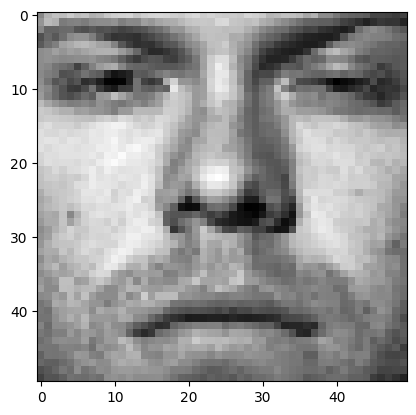

In [59]:
import numpy as np
import imageio
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data = [], []
test_labels, test_data = [], []

# Open the training data file
for line in open('./faces/train.txt'):
    # Read the image
    im = imageio.imread(line.strip().split()[0])
    
    # Reshape the image to 2500-dimensional vector and append to data
    train_data.append(im.reshape(2500,))
    
    # Append the label
    train_labels.append(line.strip().split()[1])

# Convert the lists to numpy arrays
train_data = np.array(train_data, dtype=float)
train_labels = np.array(train_labels, dtype=int)

# Print the shapes of the data and labels
print(train_data.shape, train_labels.shape)

# Train dataset
plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()

(100, 2500) (100,)


/var/folders/6_/my00vqx520n0rf0_pg1gy_780000gn/T/ipykernel_33869/42513746.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(line.strip().split()[0])


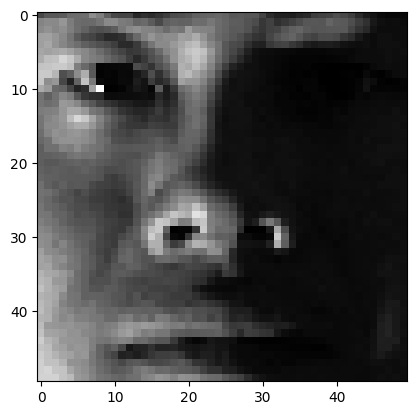

In [60]:
# Open the training data file
for line in open('./faces/test.txt'):
    # Read the image
    im = imageio.imread(line.strip().split()[0])
    
    # Reshape the image to 2500-dimensional vector and append to data
    test_data.append(im.reshape(2500,))
    
    # Append the label
    test_labels.append(line.strip().split()[1])

# Convert the lists to numpy arrays -------
test_data = np.array(test_data, dtype=float)
test_labels = np.array(test_labels, dtype=int)

# Print the shapes of the data and labels
print(test_data.shape, test_labels.shape)

# Test dataset
plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()

### (c) Compute the average face µ from the whole training

Compute the average face µ from the whole training set by summing up
every row in X then dividing by the number of faces. Display the average face as a
grayscale image.

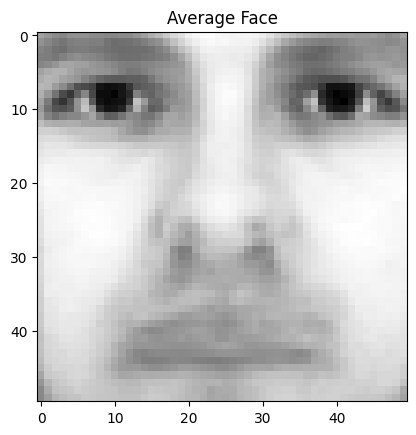

In [49]:
# Compute the average face (mean of all training images)
mu = np.mean(train_data, axis=0)  # Mean across all images (row-wise)

# Reshape and display the average face
plt.imshow(mu.reshape(50, 50), cmap=cm.Greys_r)
plt.title("Average Face")
plt.show()

### (d) Subtract average face µ from every row in X

Subtract average face µ from every row in X. That is, $x_i = x_i−µ$, where
$x_i$ is the i-th row of X. Pick a face image after mean subtraction from the new X
and display that image in grayscale. Do the same thing for the set Xtest using the
pre-computed average face µ in (c).

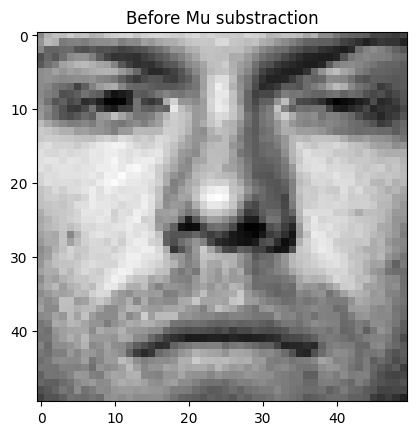

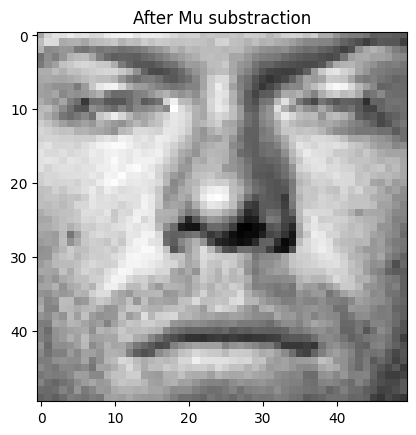

In [50]:
# Test dataset
plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Before Mu substraction")
plt.show()

muless_train = train_data - mu

# Test dataset
plt.imshow(muless_train[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("After Mu substraction")
plt.show()

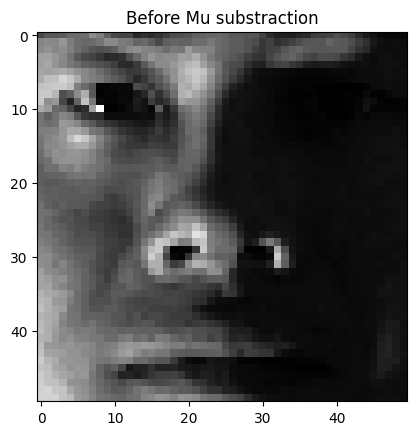

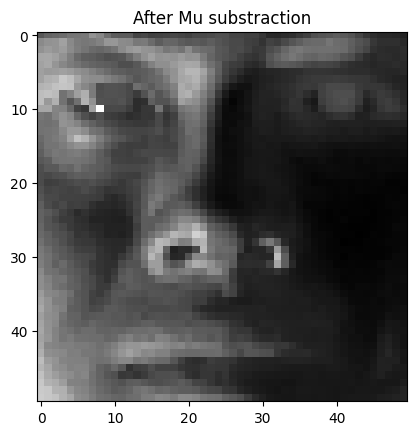

In [51]:
# Test dataset
plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Before Mu substraction")
plt.show()

muless_test = test_data - mu

# Test dataset
plt.imshow(muless_test[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("After Mu substraction")
plt.show()

### (e) Perform eigendecompostion

Perform eigendecomposition on $X^TX= VΛV^T$ to get eigenvectors $V^T$, where each row of $V^T$ has the same dimension as the face image. We refer to $v_i$, the i-th row of $V_T$, as the i-th eigenface. Display the first 10 eigenfaces as images in grayscale.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Compute covariance matrix X^T X. cov_matrix = (X^T * X)
cov_matrix = np.dot(muless_train.T, muless_train)  # Shape (2500, 2500)

# (X^T * X) = V * A * V^T
# eigenvalues = A
# eigenvectors = V 
# Compute eigenvalues and eigenvectors (https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]  # Columns are eigenfaces


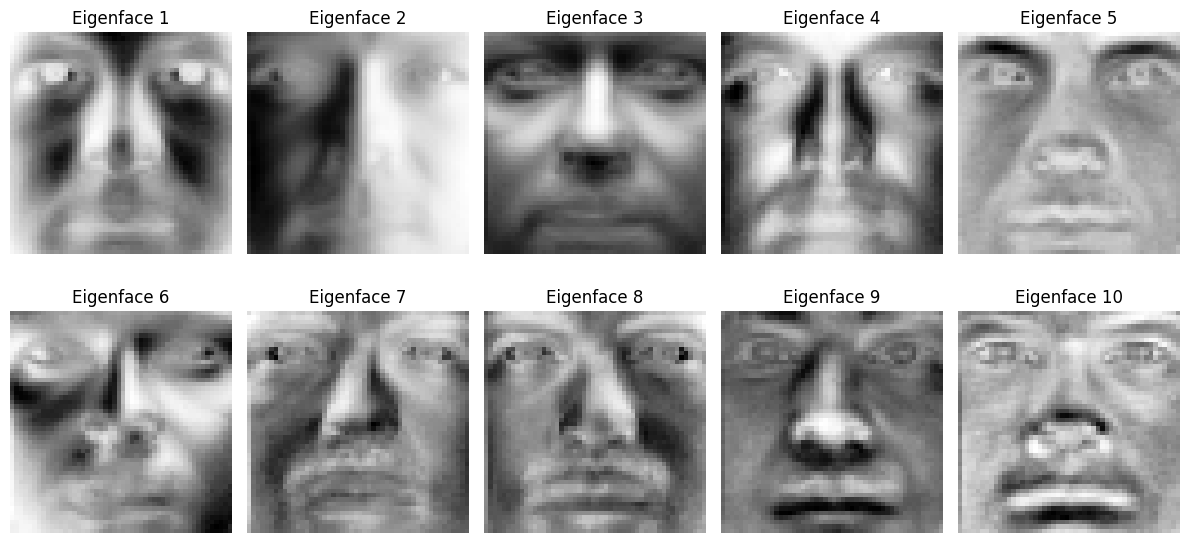

In [ ]:
# Extract the top 10 eigenfaces (first 10 columns)
top_10_eigenfaces = eigenvectors[:, :10]  # Shape (2500, 10)

# Plot the first 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # 2 rows, 5 columns

for i, ax in enumerate(axes.flat):
    ax.imshow(top_10_eigenfaces[:, i].reshape(50, 50), cmap=cm.Greys_r)
    ax.set_title(f"Eigenface {i+1}")
    ax.axis("off")  # Hide axis ticks

plt.tight_layout()
plt.show()


### (f) Write a function to generate r-dimensional feature matrix

The top r eigenfaces $V^T[:,r :] = \{v_1,v_2,...,v_r\}$ span an r-dimensional linear
subspace of the original image space called face space, whose origin is the average face µ,
and whose axes are the eigenfaces $\{v_1,v_2,...,v_r\}$. Therefore, using the top r eigenfaces
$\{v_1,v_2,...,v_r\}$, we can represent a 2500-dimensional face image z as an r-dimensional
feature vector f. Define $f= V^T[:,r:]z = [v_1,v_2,...,v_r]^Tz$. Write a function to generate
r-dimensional feature matrix $F$ and $F_{test}$ for training images $X$ and test images $X_{test}$,
respectively (to get $F$, multiply $X$ to the transpose of first $r$ rows of $V_T$,
$F$ should have the same number of rows as $X$ and $r$ columns; similarly for $X_{test}$).

In [53]:
def compute_feature_matrix(X, X_test, V_T, r):
    """
    Compute r-dimensional feature matrices F and F_test.

    Parameters:
    - X: Training images matrix (num_samples x 2500)
    - X_test: Test images matrix (num_test_samples x 2500)
    - V_T: Transposed eigenvector matrix (2500 x 2500)
    - r: Number of top eigenfaces to use

    Returns:
    - F: Feature matrix for training data (num_samples x r)
    - F_test: Feature matrix for test data (num_test_samples x r)
    """
    V_r = V_T[:r, :]  # Select the first r eigenfaces (rows)
    F = np.dot(X, V_r.T)  # Project training data onto face space
    F_test = np.dot(X_test, V_r.T)  # Project test data onto face space

    return F, F_test